<a href="https://colab.research.google.com/github/arraiyopensource/kornia-examples/blob/master/filter_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering Operations

In this tutorial you are going to learn how to use the different filtering operations found in `kornia.filters`.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Explanation

1. Load the images and create a batch.
2. Apply different filtering operators.

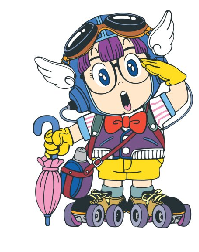

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to 
img_bgr: np.array = cv2.imread('drslump.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

# 1. Create a batch

In [12]:
import torch
import torchvision

!pip install git+https://github.com/arraiyopensource/kornia
import kornia

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-dolw7df3
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-dolw7df3
  Created wheel for kornia: filename=kornia-0.1.2+4067336-py2.py3-none-any.whl size=110458 sha256=a4606bb05a13fb0a4523162b7bd3cfbc2da51331ee0d6b1fa77ce77abf54ab51
  Stored in directory: /tmp/pip-ephem-wheel-cache-6jwkpli7/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia


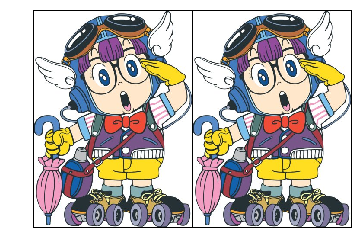

In [13]:
# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(2, -1, -1, -1)  # 4xCxHxW

# normalize
data = kornia.normalize(data.float(), torch.zeros(3), 255. * torch.ones(3))

# plot
imshow(data)

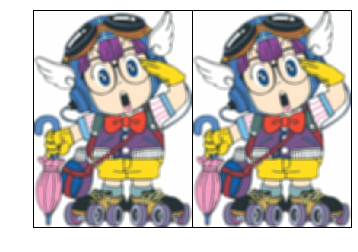

In [17]:
# Box Blur
x_blur: torch.Tensor = kornia.box_blur(data, (9, 9))
imshow(x_blur)

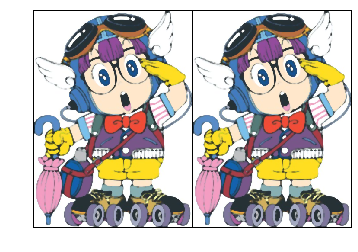

In [19]:
# Media Blur
x_blur: torch.Tensor = kornia.median_blur(data, (5, 5))
imshow(x_blur)

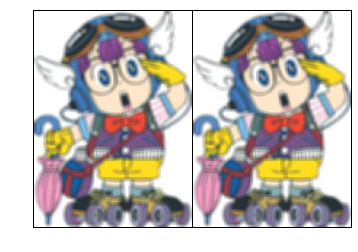

In [32]:
# Gaussian Blur
x_blur: torch.Tensor = kornia.gaussian_blur2d(data, (11, 11), (11., 11.))
imshow(x_blur)